In [1]:
# Data manipulation
import pandas as pd
import numpy as np 
#import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize
#from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
Cellphone =  pd.read_csv("Cellphone.csv")
Cellphone

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


### Drop unimportant columns

In [4]:
data =Cellphone.copy()

In [5]:
data = data.drop  ((['Product_id','Sale']),axis=1)

### Explore zero values

In [6]:
data.value_counts()

Price  weight  resoloution  ppi  cpu core  cpu freq  internal mem  ram    RearCam  Front_Cam  battery  thickness
614    69.8    1.4          129  0         0.000     0.000         0.004  0.0      0.0        800      14.1         2
628    102.9   2.2          128  0         0.000     0.256         0.128  1.3      0.0        950      18.5         2
705    110.0   2.2          128  0         0.000     0.128         0.032  2.0      0.0        900      15.6         2
754    77.9    2.4          167  0         0.000     0.004         0.004  0.0      0.0        850      12.4         2
791    66.0    1.5          121  1         0.208     0.000         0.004  0.0      0.0        800      13.2         2
                                                                                                                   ..
1916   110.0   4.7          312  4         1.200     8.000         1.500  13.0     5.0        2000     7.6          1
2357   135.0   5.2          424  8         1.350     16.000  

In [7]:
data0 = data[data['ram'] == 0]
data0

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
130,1357,165.0,4.66,200,4,1.2,0.0,0.0,5.0,0.0,2600,11.6
131,1357,165.0,4.66,200,4,1.2,0.0,0.0,5.0,0.0,2600,11.6


In [8]:
Mobile_Labels = data['Price']

In [9]:
data = data.drop(['Price'], axis = 1)

In [10]:
data

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...
156,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [11]:
data['Price'] = Mobile_Labels #put price at the end of the dataframe
data

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0,1315
4,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
...,...,...,...,...,...,...,...,...,...,...,...,...
156,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4,3551
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211
158,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8,3260
159,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211


In [12]:
data

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0,1315
4,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
...,...,...,...,...,...,...,...,...,...,...,...,...
156,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4,3551
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211
158,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8,3260
159,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211


In [13]:
Mobile_Features = data.drop(['Price'], axis = 1)
Mobile_Features

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...
156,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


# Data exploration

## Intial Overview

In [14]:
data.head()             # See the first 5 rows

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,1315
4,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749


In [15]:
data.tail()           # See the last 5 rows

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
156,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4,3551
157,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9,3211
158,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8,3260
159,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9,3211
160,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4,2536


In [16]:
data.shape        # (rows, columns)

(161, 12)

In [17]:
data.columns    # Column names

Index(['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness', 'Price'],
      dtype='object')

In [18]:
data.info()           # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        161 non-null    float64
 1   resoloution   161 non-null    float64
 2   ppi           161 non-null    int64  
 3   cpu core      161 non-null    int64  
 4   cpu freq      161 non-null    float64
 5   internal mem  161 non-null    float64
 6   ram           161 non-null    float64
 7   RearCam       161 non-null    float64
 8   Front_Cam     161 non-null    float64
 9   battery       161 non-null    int64  
 10  thickness     161 non-null    float64
 11  Price         161 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 15.2 KB


### Descriptive statistics

In [19]:
data.describe(include='all')   # Summary for numeric and categorical data

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739,2215.596273
std,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564,768.187171
min,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000,614.000000
25%,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000,1734.000000
50%,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000,2258.000000
75%,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000,2744.000000
max,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000,4361.000000


In [20]:
data['cpu core'].value_counts() # Target distribution

cpu core
4    81
8    52
2    14
0    10
6     2
1     2
Name: count, dtype: int64

In [21]:
data['cpu core'].value_counts(normalize= True)  # Target distrebution precentage

cpu core
4    0.503106
8    0.322981
2    0.086957
0    0.062112
6    0.012422
1    0.012422
Name: proportion, dtype: float64

### Data Types and Unique values

In [22]:
data.dtypes

weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
Price             int64
dtype: object

In [23]:
data.nunique() #Number of unique values in each column

weight          62
resoloution     24
ppi             45
cpu core         6
cpu freq        28
internal mem    10
ram             12
RearCam         18
Front_Cam       15
battery         55
thickness       49
Price           81
dtype: int64

## Data visualisation

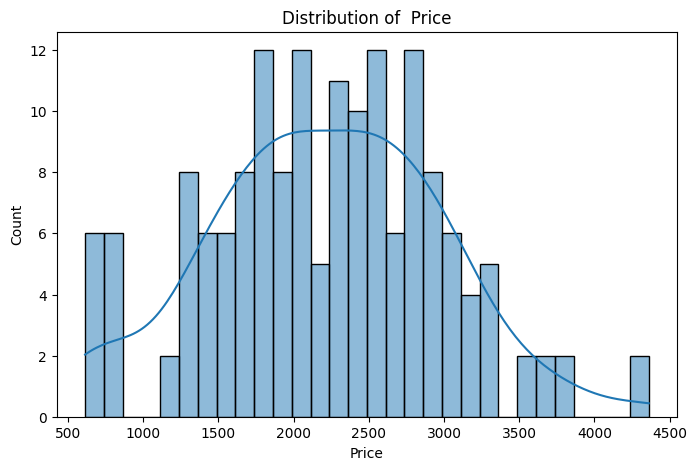

In [24]:
#Distribution of target variable (Price)
plt.figure(figsize=(8,5))
sns.histplot(data["Price"], kde=True, bins=30)
plt.title("Distribution of  Price")
plt.show()

array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'resoloution'}>,
        <Axes: title={'center': 'ppi'}>],
       [<Axes: title={'center': 'cpu core'}>,
        <Axes: title={'center': 'cpu freq'}>,
        <Axes: title={'center': 'internal mem'}>],
       [<Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'RearCam'}>,
        <Axes: title={'center': 'Front_Cam'}>],
       [<Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

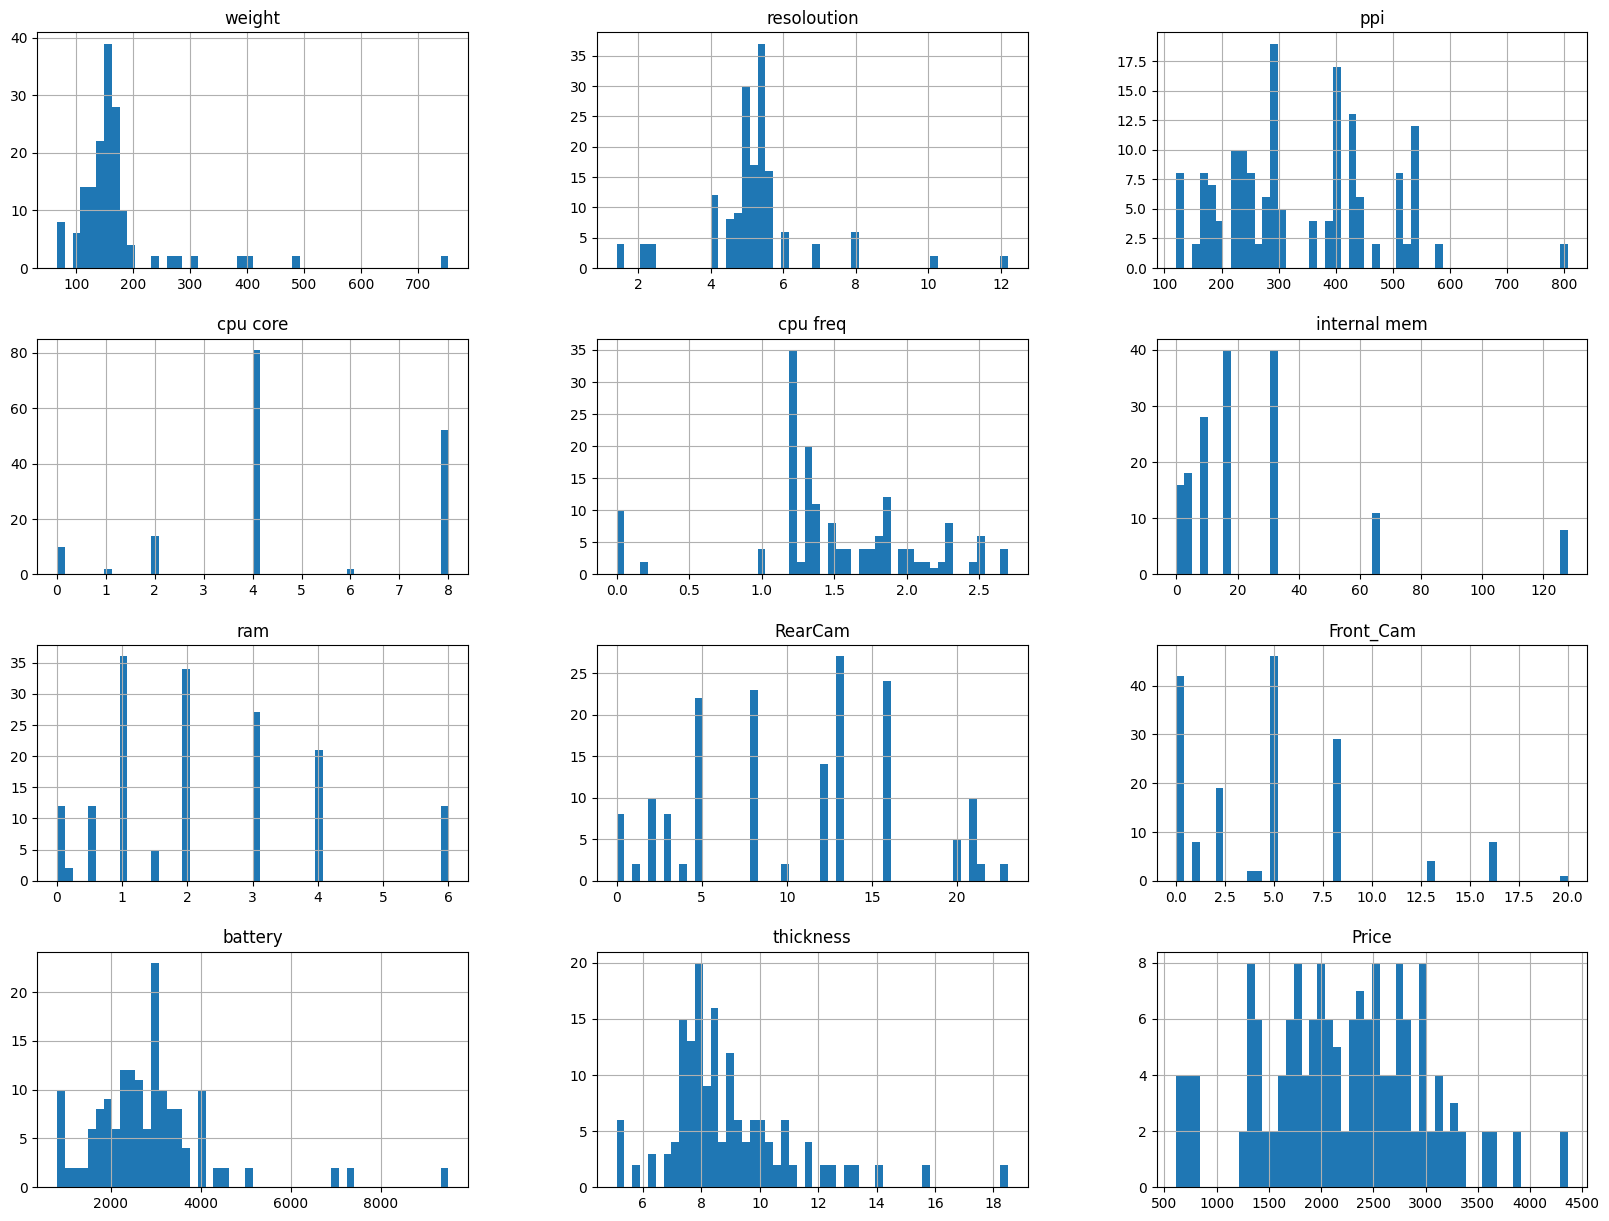

In [25]:
data.hist(bins  = 50 ,figsize= (20,15) )

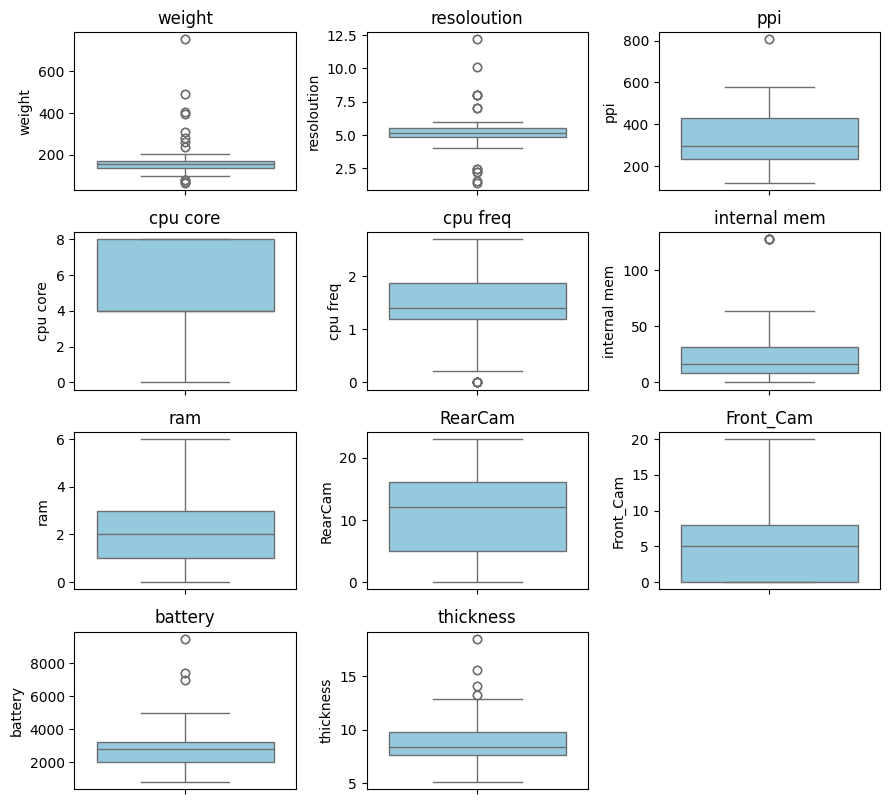

In [26]:


# Adjust number of columns for better spacing
n_cols = 3
n_rows = (len(Mobile_Features) + n_cols - 1) // n_cols  

plt.figure(figsize=(3*n_cols, 2*n_rows))  # dynamic figure size

for i, col in enumerate(Mobile_Features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()  # call ONCE after the loop
plt.show()


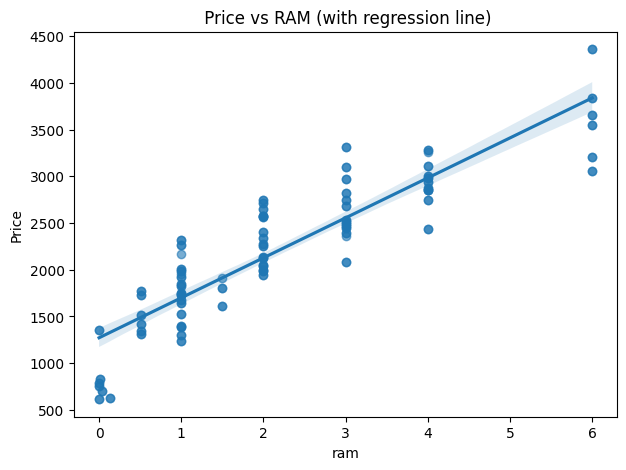

In [27]:
# Regression line (Price vs feature)
plt.figure(figsize=(7,5))
sns.regplot(data=data, x="ram", y="Price", scatter_kws={'alpha':0.6})
plt.title(" Price vs RAM (with regression line)")
plt.show()


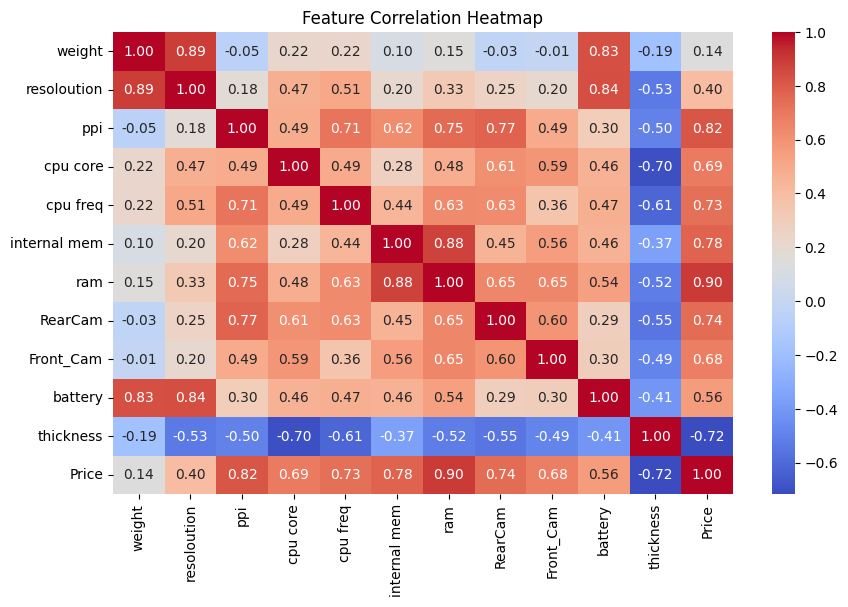

In [28]:
#Correlation heatmap (to see which features affect Sale most)
plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)   # numeric_only avoids errors if categorical exist
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: >

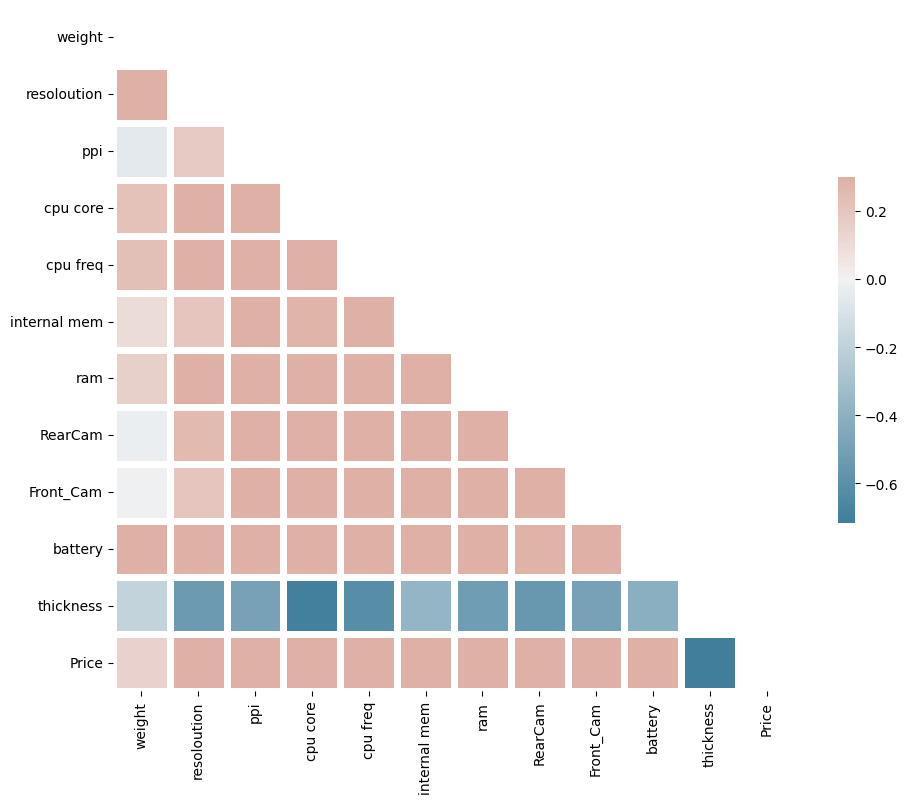

In [29]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr , dtype=bool))
f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5} )
#corrilation heat map code


# Select Models

### Train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Mobile_Features, Mobile_Labels, test_size=0.2, random_state=42)

### Scaling data

In [31]:
preprocessor = ColumnTransformer([                      # ColumnTransformer transforms to numeric matrix.
    ("num", StandardScaler(), Mobile_Features.columns)  # use .columns not df itself
])

### DecisionTreeRegressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(    random_state=42,
    max_depth=10,       # limit tree depth
    min_samples_split=10,  # minimum samples to split
    min_samples_leaf=5,    # minimum samples per leaf
    max_features=None   # limit features per split (like RandomForest does)
    )

In [33]:
pip_tree_reg = Pipeline([            #Pipeline  applies transform then fit/predict when you call .fit() or .predict().
    ("preprocessor", preprocessor),
    ("regressor", tree_reg )
    ])


In [34]:
pip_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5,
                                       min_samples_split=10,
                                       random_state=42))])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # --- Training set metrics ---
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # --- Test set metrics ---
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    print("Train Set Metrics:")
    print(f"MAE: {train_mae:.2f}")
    print(f"RMSE: {train_rmse:.2f}")
    print(f"R²: {train_r2:.4f}")
    print("\nTest Set Metrics:")
    print(f"MAE: {test_mae:.2f}")
    print(f"RMSE: {test_rmse:.2f}")
    print(f"R²: {test_r2:.4f}")


In [ ]:
evaluate_model(pip_tree_reg, X_train, y_train, X_test, y_test)

Train Set Metrics:
MAE: 119.35
RMSE: 162.21
R²: 0.9555

Test Set Metrics:
MAE: 157.20
RMSE: 211.67
R²: 0.9210


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pip_tree_reg, X_train, y_train, cv =5 , scoring="r2") #

print("CV R² scores:", scores)
print("Mean R²:", np.mean(scores))

#the output of using tree_reg as the same as using pip_tree_reg in cross_val_score
#because the tree-based models dont benefit much from scaling (they split based on thresholds, not distances)

CV R² scores: [0.87583863 0.82051569 0.9191134  0.89185619 0.88621466]
Mean R²: 0.878707712325479


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(random_state=42)

In [39]:
#forest_reg = Pipeline([ # Pipeline  applies transform then fit/predict when you call .fit() or .predict().
#    ("preprocessor", preprocessor),
#    ("regressor", rf_reg)
#])

In [40]:
#forest_reg.fit(X_train, y_train)

#### hyperparameter distributions

In [41]:
from scipy.stats import randint
param_distributions =  {
    'n_estimators' : randint (low = 100, high = 500), # Number of the trees in the forest
    'max_depth' : randint (low = 5,high = 20), # Max depth of the tree
    'min_samples_split' : randint(low = 2,high = 10), # Min number of samples required to split an internal node
    'min_samples_leaf' : randint (low = 1, high = 10), # Min number of samples required to be at a leaf node
    'max_features' : ['sqrt', 'log2',1.0, None], # Number of features to consider when looking fro the best split
    'bootstrap' : [True, False] # whether bootstrap samples are used when building trees
}

#### Initialize RandomizedSearchCV.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
forest_reg_random = RandomizedSearchCV(
 estimator = rf_reg,
 param_distributions = param_distributions,
 n_iter = 100, # Number of parameter settings that are sampled
 cv = 5,       # Number of cross-validation folds
 verbose=2,    # Controls the verbosity of the output

 n_jobs= -1   # Use all available CPU cores
)

In [43]:
forest_reg_random.fit (X_train, y_train) #fit of the all random param including the best_params

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D88C25790>,
                                        'max_features': ['sqrt', 'log2', 1.0,
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D898B1650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D898B1050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D88B66810>},
                   verbose=2)

In [44]:
print ("Best parameters", forest_reg_random.best_params_) 
best_rf_model = forest_reg_random.best_estimator_ #forest_reg_random.best_estimator_ points to that refitted so you dont need to refit the best_rf_model

Best parameters {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 124}


In [ ]:
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)

Train Set Metrics:
MAE: 2.62
RMSE: 5.30
R²: 1.0000

Test Set Metrics:
MAE: 36.20
RMSE: 67.23
R²: 0.9920


### XGBRegressor

In [47]:
import xgboost as xgb

In [48]:
xgb_reg = xgb.XGBRegressor (random_state = 42)

In [52]:
from scipy.stats import randint, uniform

#randint works with int and uniform works with floats

param_distributions_xgb = {
    'learning_rate': uniform(0.01, 0.2),    # eta in XGBoost
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),         # range 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # range 0.5 to 1.0
    'n_estimators': randint(100, 500)       # number of trees
}


In [53]:
xgb_reg_random = RandomizedSearchCV(
 estimator = xgb_reg,
 param_distributions = param_distributions_xgb,
 n_iter = 100, # Number of parameter settings that are sampled
 cv = 5,       # Number of cross-validation folds
 verbose=2,    # Controls the verbosity of the output

 n_jobs= -1   # Use all available CPU cores
)

In [54]:
xgb_reg_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D888A6BD0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D88E4A890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027D8827C390>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027D8827ED10>},
                   verbose=2)

In [55]:
print("xgb best parametrs", xgb_reg_random.best_params_ )
best_xgb_model = xgb_reg_random.best_estimator_

xgb best parametrs {'colsample_bytree': np.float64(0.9207827043098479), 'learning_rate': np.float64(0.18243596024708428), 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 141, 'subsample': np.float64(0.8393001759326014)}


In [ ]:
evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)

Train Set Metrics:
MAE: 6.39
RMSE: 16.98
R²: 0.9995

Test Set Metrics:
MAE: 47.91
RMSE: 84.10
R²: 0.9875


### Evaluate all models

In [76]:
def evaluate_model_df(model, X_train, y_train, X_test, y_test, name = 'model'):
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Metrics
    results = {
        'Model': name,
        'Train_MAE' : mean_absolute_error(y_train, y_train_pred),
        'Train_RMSE' : np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train_R2' : r2_score(y_train, y_train_pred),
        'Test_MAE' : mean_absolute_error(y_test,y_test_pred),
        'Test_RMSE' : np.sqrt(mean_squared_error(y_test,y_test_pred)),
        'Test_R2' : r2_score(y_test,y_test_pred),
    }
    return results

In [77]:
results = []

results.append(evaluate_model_df(pip_tree_reg, X_train, y_train, X_test, y_test, "DecisionTree"))
results.append(evaluate_model_df(best_rf_model, X_train, y_train, X_test, y_test, "RandomForest"))
results.append(evaluate_model_df(best_xgb_model, X_train, y_train, X_test, y_test, "XGBoost"))


results_df = pd.DataFrame(results)
results_df

,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
0,DecisionTree,119.354619,162.207082,0.955495,157.199904,211.674215,0.920962
1,RandomForest,2.620372,5.296658,0.999953,36.204165,67.234455,0.992026
2,XGBoost,6.392100,16.980291,0.999512,47.909225,84.096389,0.987525


In [78]:
print(results_df.columns)
print(results_df.head())


Index(['Model', 'Train_MAE', 'Train_RMSE', 'Train_R2', 'Test_MAE', 'Test_RMSE',
       'Test_R2'],
      dtype='object')
          Model   Train_MAE  Train_RMSE  Train_R2    Test_MAE   Test_RMSE  \
0  DecisionTree  119.354619  162.207082  0.955495  157.199904  211.674215   
1  RandomForest    2.620372    5.296658  0.999953   36.204165   67.234455   
2       XGBoost    6.392100   16.980291  0.999512   47.909225   84.096389   

    Test_R2  
0  0.920962  
1  0.992026  
2  0.987525  


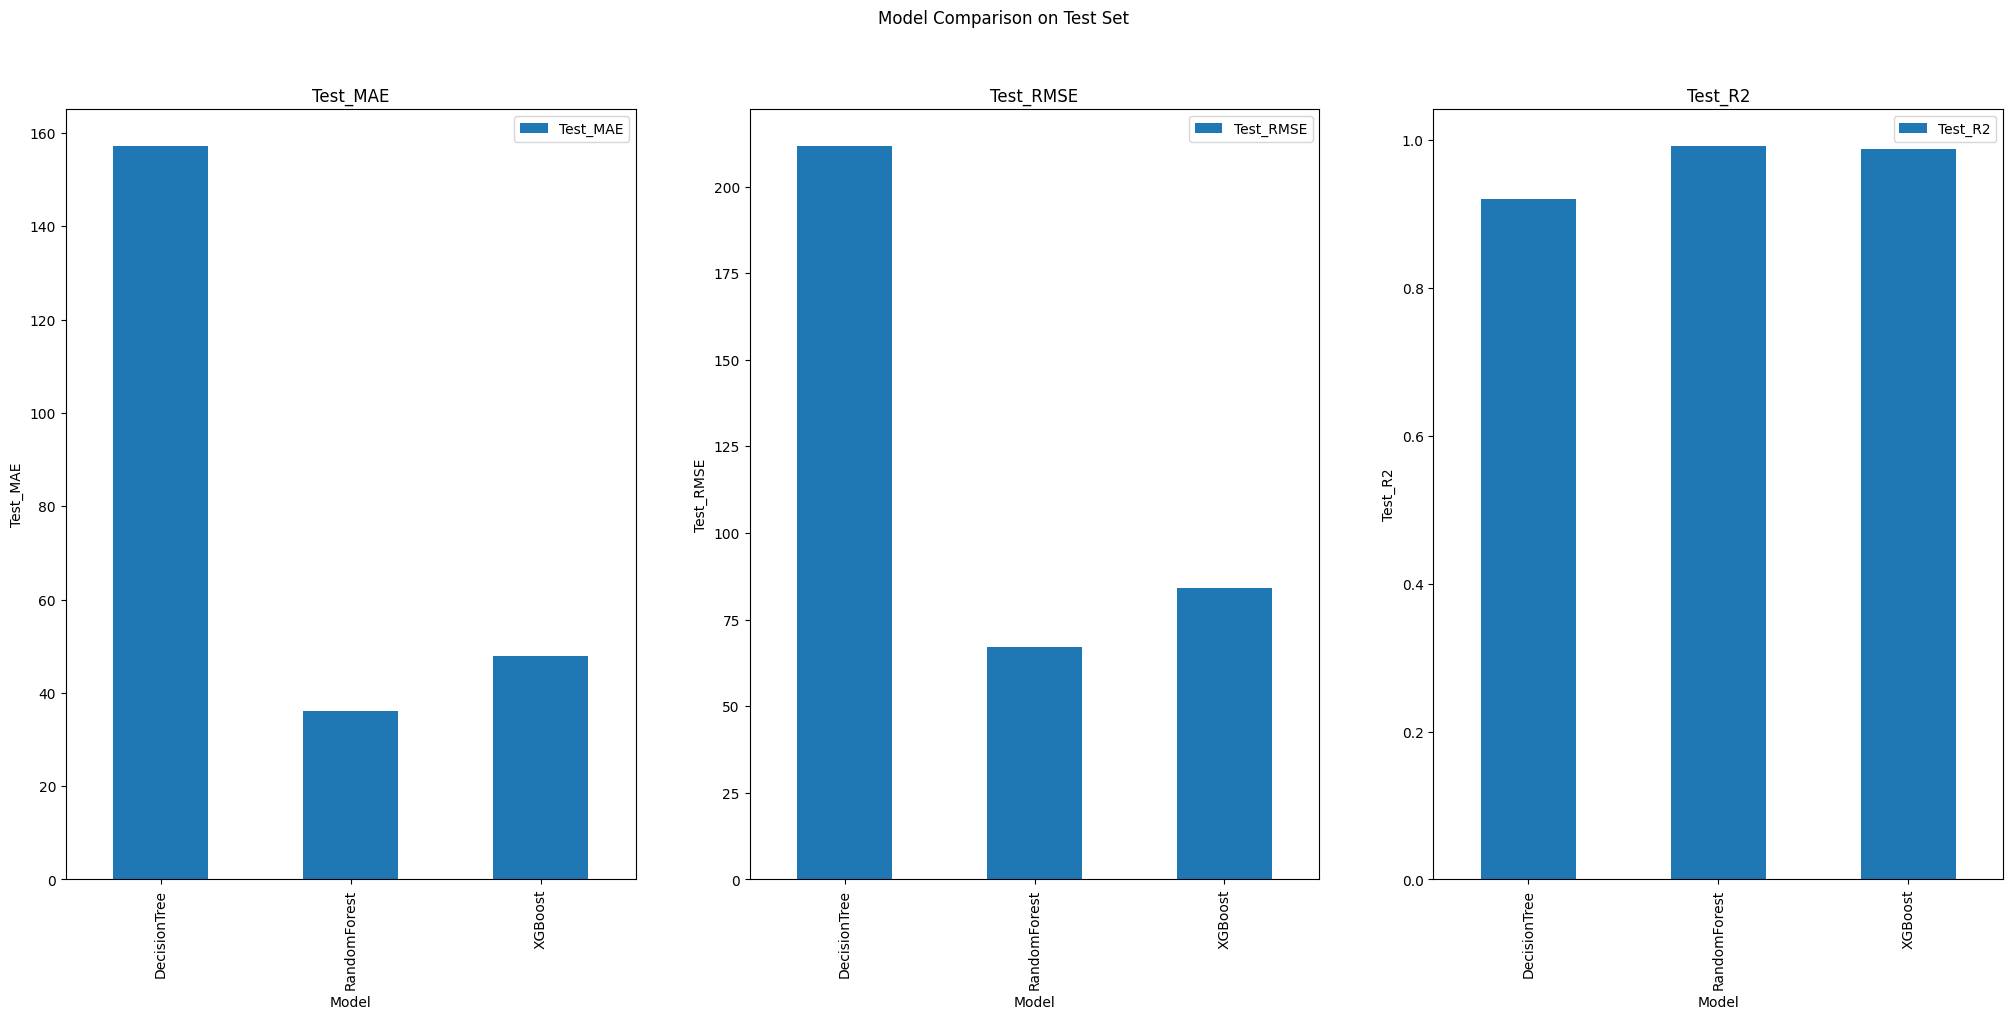

In [87]:

metrics = ["Test_MAE", "Test_RMSE", "Test_R2"] # must match the name of columns in results_df


# Create 1 row with 3 plots (for 3 metrics)
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Loop through each metric
for i, metric in enumerate(metrics):
    results_df.plot(kind="bar", x="Model", y=metric, ax=axes[i], legend=True)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)

plt.suptitle("Model Comparison on Test Set")
plt.show()


<Figure size 600x500 with 0 Axes>

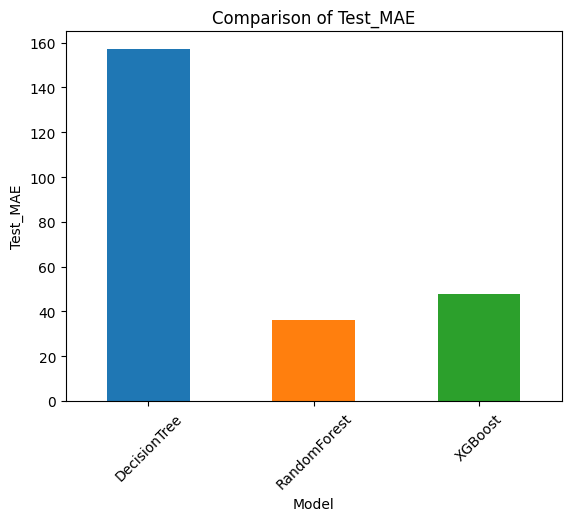

<Figure size 600x500 with 0 Axes>

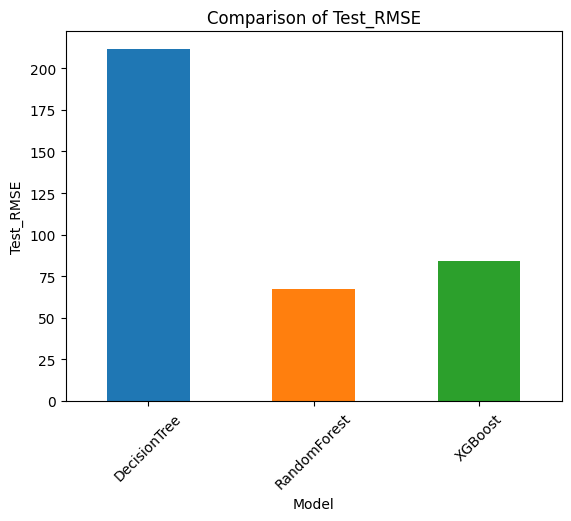

<Figure size 600x500 with 0 Axes>

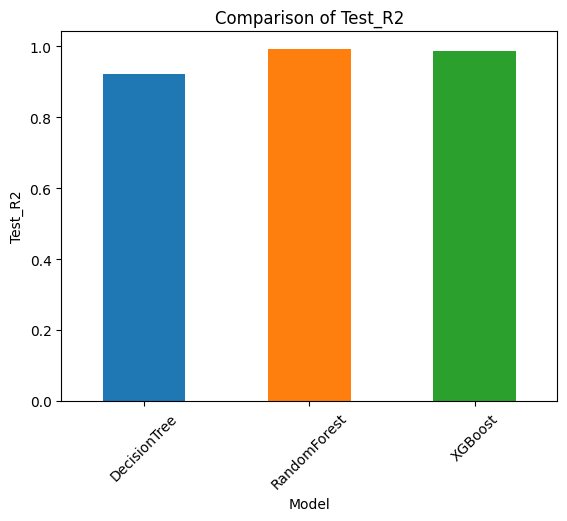

In [89]:
import matplotlib.pyplot as plt

# List of metrics (must match DataFrame column names)
metrics = ["Test_MAE", "Test_RMSE", "Test_R2"]

# Define a color palette for the models
model_colors = dict(zip(results_df["Model"].unique(), plt.cm.tab10.colors))

# Plot each metric separately with unique colors for each model
for metric in metrics:
    plt.figure(figsize=(6, 5))
    results_df.plot(
        kind="bar",
        x="Model",
        y=metric,
        legend=False,
        color=[model_colors[m] for m in results_df["Model"]]
    )
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.show()


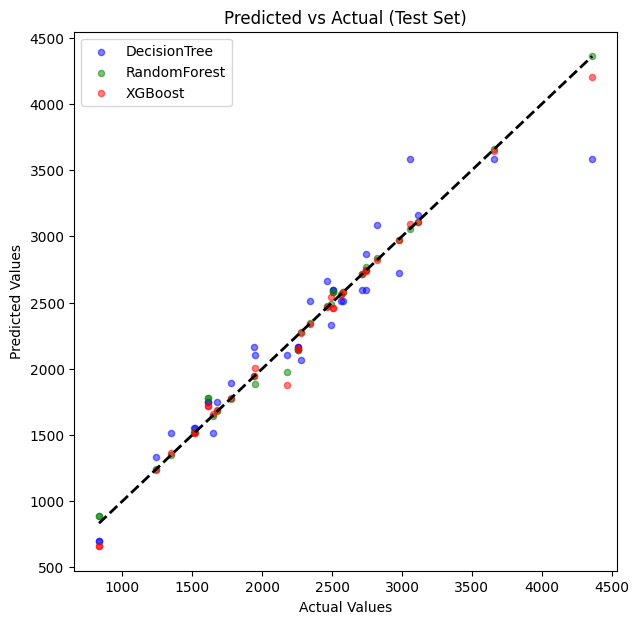

In [68]:
plt.figure(figsize=(7,7))

for model, name, color in [
    (pip_tree_reg, "DecisionTree", "blue"),
    (best_rf_model, "RandomForest", "green"),
    (best_xgb_model, "XGBoost", "red")
]:
    y_pred_test = model.predict(X_test)
    plt.scatter(y_test, y_pred_test, alpha=0.5, label=name, s=20, color=color)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Test Set)")
plt.legend()
plt.show()
